# Importing packages and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("Quality measures (1).csv")

<ipython-input-5-32512e349c5f>:1: DtypeWarning: Columns (1,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Quality measures (1).csv")


# Basic data information retrieval

In [6]:
df.head()

,QID,Provider ID,ZIP Code,Condition,Measure ID,Score,Sample,Footnote,Re-Admission Rate,Emergency department wait time,Morality Rate,Efficiency
0,0,140002,62002.0,Heart Attack or Chest Pain,OP_4,92,40,NaN,0.613478,51.0,0.394627,0.071136
1,1,140002,62002.0,Heart Attack or Chest Pain,OP_5,12,40,NaN,0.765448,63.0,0.040530,0.031359
2,2,140002,62002.0,Stroke Care,STK_8,94,34,2 - Data submitted were based on a sample of c...,0.342561,36.0,0.552335,0.859076
3,3,140007,60435.0,Emergency Department,OP_20,41,413,NaN,0.547194,37.0,0.111548,0.124123
4,4,140007,60435.0,Emergency Department,OP_21,54,168,NaN,0.427875,43.0,0.119102,0.029686


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180763 entries, 0 to 180762
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   QID                             180763 non-null  int64  
 1   Provider ID                     53351 non-null   object 
 2   ZIP Code                        53351 non-null   float64
 3   Condition                       53351 non-null   object 
 4   Measure ID                      53351 non-null   object 
 5   Score                           53351 non-null   object 
 6   Sample                          51972 non-null   object 
 7   Footnote                        42316 non-null   object 
 8   Re-Admission Rate               53351 non-null   float64
 9   Emergency department wait time  53351 non-null   float64
 10  Morality Rate                   53351 non-null   float64
 11  Efficiency                      53351 non-null   float64
dtypes: float64(5), i

In [ ]:
# drop not requried variables
df.drop(['QID','Provider ID'], axis=1, inplace = True)

In [8]:
df.head()

,QID,Provider ID,ZIP Code,Condition,Measure ID,Score,Sample,Footnote,Re-Admission Rate,Emergency department wait time,Morality Rate,Efficiency
0,0,140002,62002.0,Heart Attack or Chest Pain,OP_4,92,40,NaN,0.613478,51.0,0.394627,0.071136
1,1,140002,62002.0,Heart Attack or Chest Pain,OP_5,12,40,NaN,0.765448,63.0,0.040530,0.031359
2,2,140002,62002.0,Stroke Care,STK_8,94,34,2 - Data submitted were based on a sample of c...,0.342561,36.0,0.552335,0.859076
3,3,140007,60435.0,Emergency Department,OP_20,41,413,NaN,0.547194,37.0,0.111548,0.124123
4,4,140007,60435.0,Emergency Department,OP_21,54,168,NaN,0.427875,43.0,0.119102,0.029686


# Check for null values

In [9]:
df.isnull().sum()

QID                                    0
Provider ID                       127412
ZIP Code                          127412
Condition                         127412
Measure ID                        127412
Score                             127412
Sample                            128791
Footnote                          138447
Re-Admission Rate                 127412
Emergency department wait time    127412
Morality Rate                     127412
Efficiency                        127412
dtype: int64

In [10]:
# checking null values % in the data
df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False).head()

Footnote       76.59
Sample         71.25
Provider ID    70.49
ZIP Code       70.49
Condition      70.49
dtype: float64

## replacing null values with appropriate values

In [11]:
# replacing null values in different columns in df

df['Score'] = df['Score'].replace(['Not Available'], ['0'])
df['Score'] = df['Score'].replace([''], ['-1'])
df['Score'] = df['Score'].replace(['High (40,000 - 59,999 patients annually)'], ['50000'])
df['Score'] = df['Score'].replace(['Very High (60,000+ patients annually)'], ['70000'])
df['Score'] = df['Score'].replace(['Medium (20,000 - 39,999 patients annually)'], ['30000'])
df['Score'] = df['Score'].replace(['Low (0 - 19,999 patients annually)'], ['10000'])
df['Sample'] = df['Sample'].replace(['Not Available'], ['0'])
df['Sample'] = df['Sample'].replace([''], ['0'])


In [12]:
# filling na values in categorical columns with 0

cat_cols = ['Condition', 'Measure ID', 'Score', 'Sample',
       'Footnote']
for x in cat_cols:
  df[x] = df[x].fillna('0')

num_cols = ['ZIP Code','Re-Admission Rate','Emergency department wait time','Efficiency','Morality Rate']
for x in num_cols:
  df[x] = df[x].fillna(0)

In [13]:
df.columns

Index(['QID', 'Provider ID', 'ZIP Code', 'Condition', 'Measure ID', 'Score',
       'Sample', 'Footnote', 'Re-Admission Rate',
       'Emergency department wait time', 'Morality Rate', 'Efficiency'],
      dtype='object')

In [14]:
print(df['ZIP Code'].unique())
print(df['Score'].unique())
print(df['Sample'].unique())
print(df['Re-Admission Rate'].unique())

[62002. 60435. 60608. ... 62274. 58102.     0.]
['92' '12' '94' '41' '54' '2' '86' '64' '0' '277' '59' '50000' '100' '99'
 '91' '123' '47' '61' '3' '87' '300' '83' '70000' '81' '76' '199' '98'
 '97' '95' '96' '93' '85' '88' '14' '418' '201' '270' '80' '1' '5' '38'
 '236' '44' '30000' '118' '17' '42' '34' '448' '213' '52' '184' '27' '72'
 '73' '62' '90' '289' '69' '77' '46' '49' '154' '24' '10000' '116' '75'
 '7' '256' '102' '161' '26' '31' '225' '112' '16' '39' '6' '13' '250'
 '138' '22' '65' '82' '51' '9' '246' '141' '15' '8' '18' '48' '89' '153'
 '40' '142' '60' '79' '111' '68' '186' '84' '106' '279' '55' '32' '408'
 '148' '230' '4' '57' '351' '200' '36' '376' '178' '208' '11' '344' '130'
 '180' '33' '384' '170' '121' '50' '30' '232' '134' '117' '120' '20' '35'
 '45' '245' '139' '66' '260' '457' '196' '303' '124' '268' '136' '70' '29'
 '43' '183' '74' '330' '104' '194' '10' '63' '78' '128' '192' '109' '157'
 '56' '108' '21' '240' '122' '155' '288' '125' '286' '53' '204' '212'
 '164' 

# Checking for duplicate data

In [15]:
# checking the duplicate rows
df.loc[df.duplicated()]

,QID,Provider ID,ZIP Code,Condition,Measure ID,Score,Sample,Footnote,Re-Admission Rate,Emergency department wait time,Morality Rate,Efficiency


# Checking for categorical data and encoding them

categorical variables in the df
Condition                          
Measure ID                         
Score                              
Sample                             
Footnote                           

In [16]:
# convert Sample and Score to int type

df["Score"] = df["Score"].astype(int)
df["Sample"] = df["Sample"].astype(int)


## Splitting data into X and Y and train data and test data before encoding the categorical variables because else data leakage happens

In [17]:
ind_columns = ['ZIP Code', 'Condition', 'Measure ID', 'Score',
       'Sample', 'Footnote', 'Re-Admission Rate',
       'Emergency department wait time', 'Efficiency']

X = df[ind_columns]
Y = df['Morality Rate']

### splitting data in test data and train data

In [18]:
# splitting the dataset into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(144610, 9) (144610,) (36153, 9) (36153,)


In [19]:
X_train.columns

Index(['ZIP Code', 'Condition', 'Measure ID', 'Score', 'Sample', 'Footnote',
       'Re-Admission Rate', 'Emergency department wait time', 'Efficiency'],
      dtype='object')

In [20]:
X_train['ZIP Code'].unique()

array([    0., 53215., 66112., ..., 46953., 58102., 50548.])

## Encoding data using label encoder

In [21]:
# Encoding of categorical data

#Segregation of Numerical and Categorical Variables/Columns

#Later concat them
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

print(cat_col)
print(num_col)

data_cat = df[cat_col]
data_num = df[num_col]

Index(['Provider ID', 'Condition', 'Measure ID', 'Footnote'], dtype='object')
Index(['QID', 'ZIP Code', 'Score', 'Sample', 'Re-Admission Rate',
       'Emergency department wait time', 'Morality Rate', 'Efficiency'],
      dtype='object')


### checking unique values of all categorical columns

In [22]:
df['Condition'].unique()

array(['Heart Attack or Chest Pain', 'Stroke Care',
       'Emergency Department', 'Heart Failure', 'Preventive Care',
       'Pregnancy and Delivery Care', 'Pneumonia',
       'Surgical Care Improvement Project',
       'Blood Clot Prevention and Treatment', "Children's Asthma", '0'],
      dtype=object)

In [23]:
df['Measure ID'].unique()

array(['OP_4', 'OP_5', 'STK_8', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3b', 'AMI_7a', 'AMI_8a', 'ED_1b', 'ED_2b', 'EDV', 'HF_2',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_1', 'OP_18b', 'OP_2',
       'PC_01', 'PN_6', 'SCIP_CARD_2', 'SCIP_INF_1', 'SCIP_INF_2',
       'SCIP_INF_3', 'SCIP_INF_9', 'SCIP_VTE_2', 'STK_1', 'STK_10',
       'STK_2', 'STK_3', 'STK_4', 'STK_5', 'STK_6', 'VTE_1', 'VTE_2',
       'VTE_3', 'VTE_4', 'VTE_5', 'VTE_6', 'CAC_3', '0'], dtype=object)

In [24]:
df['Footnote'].unique()

array(['0',
       '2 - Data submitted were based on a sample of cases/patients.',
       '7 - No cases met the criteria for this measure.',
       '1 - The number of cases/patients is too few to report., 3 - Results are based on a shorter time period than required.',
       '2 - Data submitted were based on a sample of cases/patients., 3 - Results are based on a shorter time period than required.',
       '1 - The number of cases/patients is too few to report., 2 - Data submitted were based on a sample of cases/patients.',
       '2 - Data submitted were based on a sample of cases/patients., 7 - No cases met the criteria for this measure.',
       '5 - Results are not available for this reporting period.',
       '3 - Results are based on a shorter time period than required., 7 - No cases met the criteria for this measure.',
       '1 - The number of cases/patients is too few to report.',
       '3 - Results are based on a shorter time period than required.',
       '1 - The number of

### Encoding categorical columns in train and test data using labelencoder

Check the difference between fit_transform method and transform method - https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [25]:
# label encoding

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels 
label_encoder.fit(X_train['Condition'])
X_train['Condition']= label_encoder.transform(X_train['Condition'])
X_test['Condition']= label_encoder.transform(X_test['Condition'])
print(X_train['Condition'].unique())

label_encoder.fit(X_train['Measure ID'])
X_train['Measure ID']= label_encoder.transform(X_train['Measure ID'])
X_test['Measure ID']= label_encoder.transform(X_test['Measure ID'])
print(X_train['Measure ID'].unique())

label_encoder.fit(X_train['Footnote'])
X_train['Footnote']= label_encoder.transform(X_train['Footnote'])
X_test['Footnote']= label_encoder.transform(X_test['Footnote'])
print(X_train['Footnote'].unique())


[ 0 10  4  9  3  1  8  5  7  6  2]
[ 0 24 19 30 27 13 37 39 16 23 41 38 18  2  4 40 22 36  1  8 32 29  7 31
 11 26 15  6 14 35 20 10  5 34 28 33 25 12 17 21  9  3]
[ 0  9 11 10  6  5  8  1 12  4  7  3  2]


# Plotting correlation matrix for all independent variables

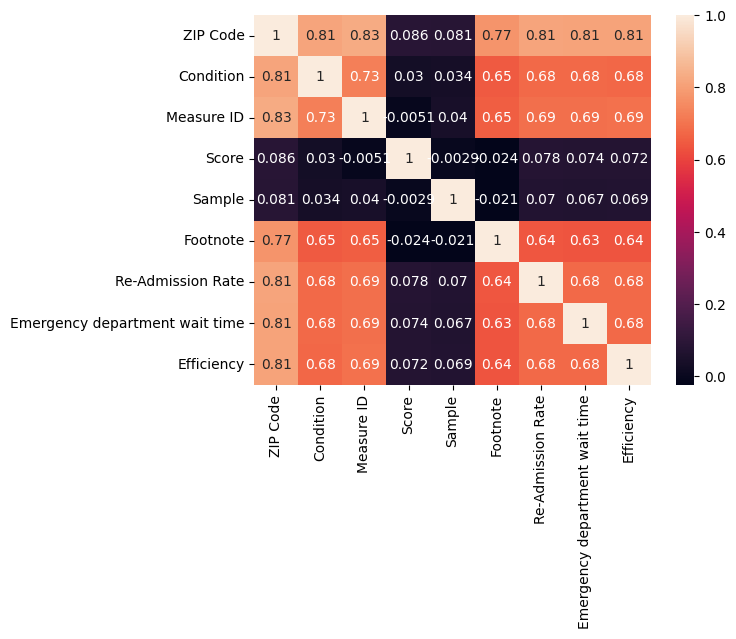

In [26]:
import seaborn as sn
corr_matrix = X_train.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

# Linear Regression model

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## test the data

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

In [30]:
# Making predictions using the final model
y_pred = regressor.predict(X_test)

In [31]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.08
Mean squared error = 0.03
R2 score = 0.67


# Plotting the linear regression model

In [41]:
y_train_arr = y_train.to_numpy()
y_train_new = y_train_arr.reshape(y_train.shape[0], 1)
y_train_new.shape

(144610, 1)

In [33]:
import seaborn as sns
     

In [34]:
y_test

177652    0.000000
167883    0.000000
41294     0.904877
171415    0.000000
31257     0.147543
            ...   
1917      0.692998
83858     0.000000
144125    0.000000
53693     0.000000
5403      0.276393
Name: Morality Rate, Length: 36153, dtype: float64

In [36]:
import numpy as np
np.array(y_test)
     

array([0.        , 0.        , 0.90487655, ..., 0.        , 0.        ,
       0.27639291])

In [37]:
y_pred

array([0.00313007, 0.00313007, 0.52995099, ..., 0.00313007, 0.00313007,
       0.47710017])

<Axes: ylabel='Morality Rate'>

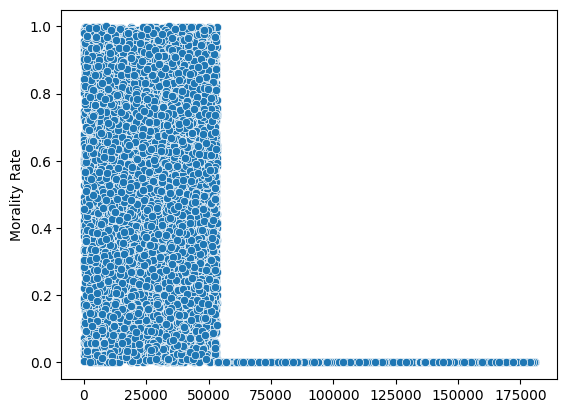

In [42]:
sns.scatterplot(y_test)

<Axes: >

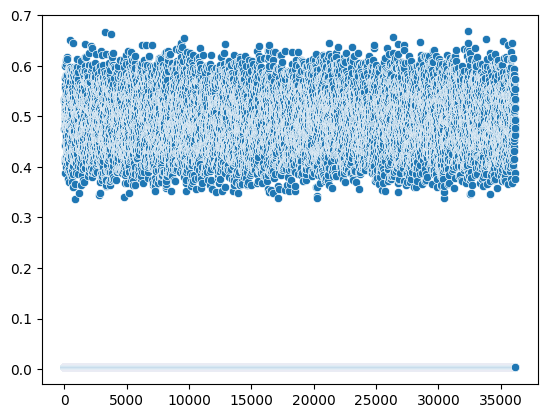

In [43]:
sns.scatterplot(y_pred)

<Axes: ylabel='Morality Rate'>

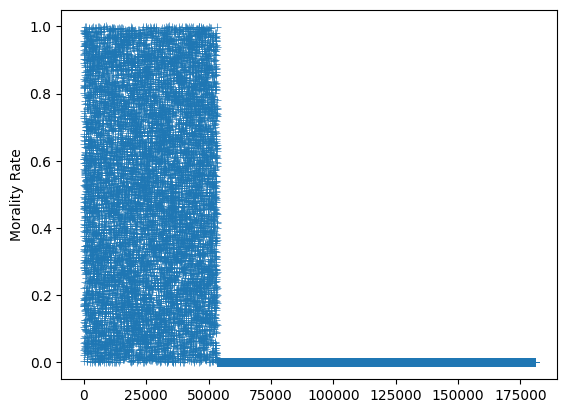

In [47]:
sns.scatterplot(y_test, marker="+")


<Axes: >

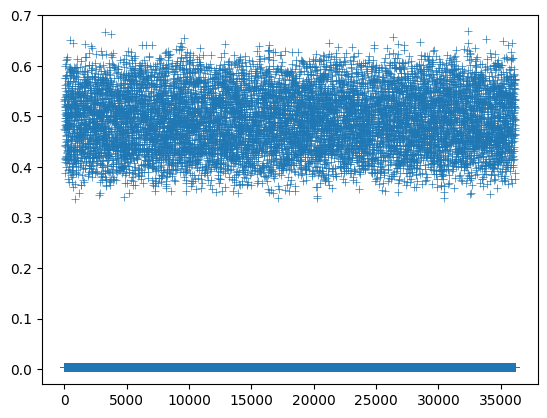

In [48]:
sns.scatterplot(y_pred, marker="+")

<Axes: ylabel='Morality Rate'>

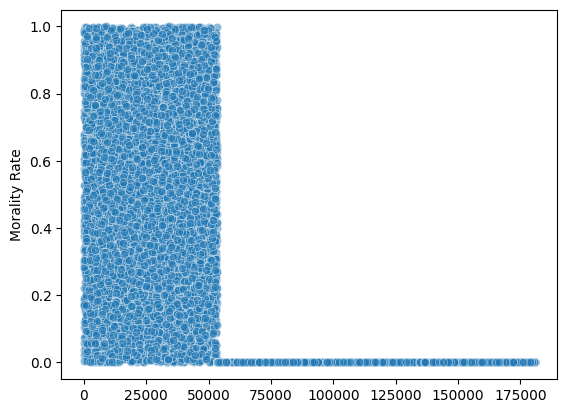

In [50]:
sns.scatterplot(y_test, alpha=0.5)

<Axes: >

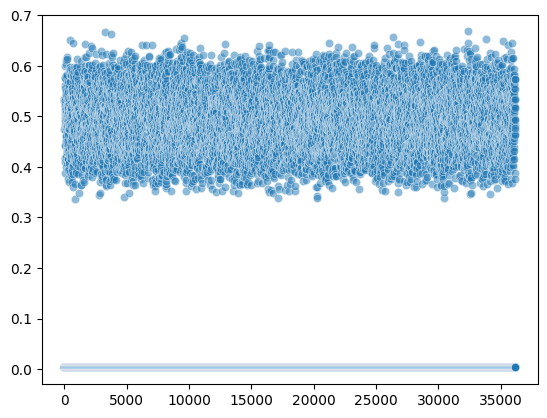

In [51]:
sns.scatterplot(y_pred, alpha=0.5)